In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

RANDOM_SEED = 42

# Specify each path

In [ ]:
dataset = 'model/keypoint_classifier/keypoint_v4.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_v4.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_v4.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 5

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, stratify= y_dataset)

In [ ]:
print(np.unique(y_dataset, return_counts = True))

(array([0, 1, 2, 3, 4], dtype=int32), array([2601, 2600, 2600, 2600, 2600]))


# Model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
69/77 [=========================>....] - ETA: 0s - loss: 1.6138 - accuracy: 0.2429
Epoch 1: saving model to /content/mydrive/MyDrive/Dự án/keypoint_classifier_v4.hdf5
77/77 [==============================] - 1s 6ms/step - loss: 1.6070 - accuracy: 0.2474 - val_loss: 1.4920 - val_accuracy: 0.4632
Epoch 2/1000
54/77 [====================>.........] - ETA: 0s - loss: 1.4788 - accuracy: 0.3639

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


71/77 [==========================>...] - ETA: 0s - loss: 1.4605 - accuracy: 0.3763
Epoch 2: saving model to /content/mydrive/MyDrive/Dự án/keypoint_classifier_v4.hdf5
77/77 [==============================] - 0s 4ms/step - loss: 1.4547 - accuracy: 0.3801 - val_loss: 1.2518 - val_accuracy: 0.6035
Epoch 3/1000
70/77 [==========================>...] - ETA: 0s - loss: 1.2788 - accuracy: 0.4701
Epoch 3: saving model to /content/mydrive/MyDrive/Dự án/keypoint_classifier_v4.hdf5
77/77 [==============================] - 0s 4ms/step - loss: 1.2699 - accuracy: 0.4751 - val_loss: 0.9773 - val_accuracy: 0.7533
Epoch 4/1000
73/77 [===========================>..] - ETA: 0s - loss: 1.1154 - accuracy: 0.5580
Epoch 4: saving model to /content/mydrive/MyDrive/Dự án/keypoint_classifier_v4.hdf5
77/77 [==============================] - 0s 4ms/step - loss: 1.1122 - accuracy: 0.5599 - val_loss: 0.7829 - val_accuracy: 0.8059
Epoch 5/1000
72/77 [===========================>..] - ETA: 0s - loss: 1.0015 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


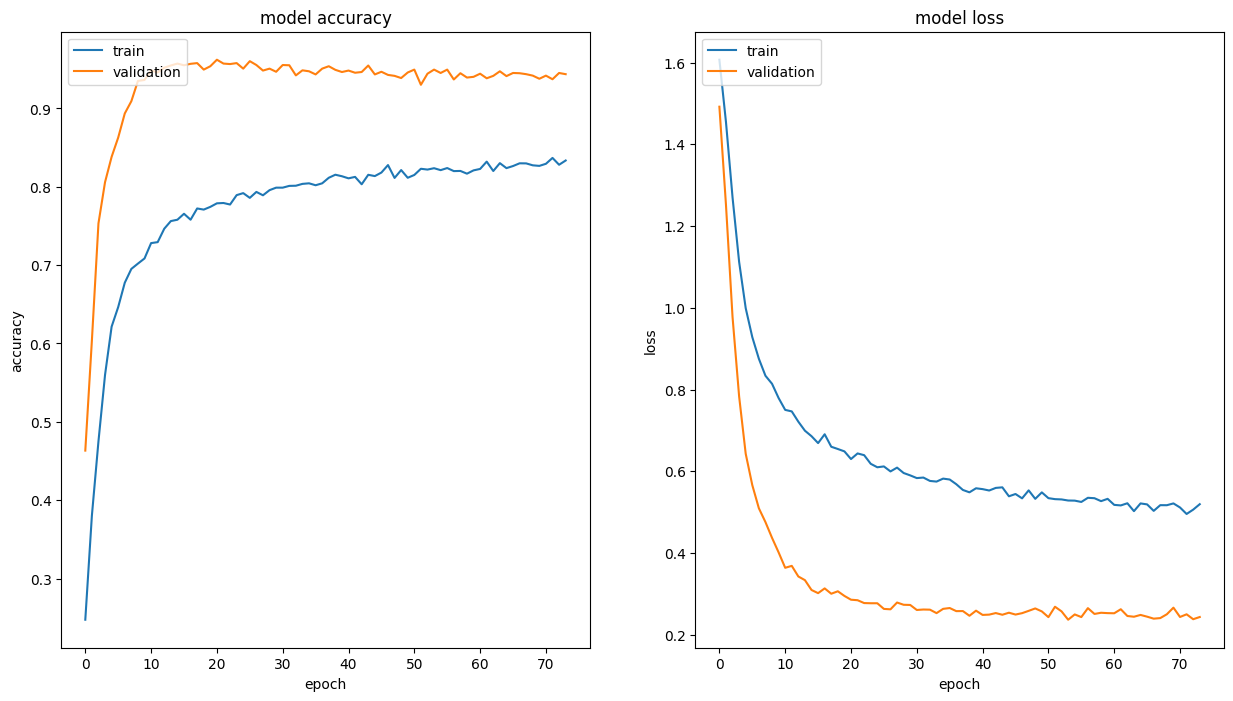

In [ ]:
print(history.history.keys())
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
# "Loss"
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

26/26 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9437


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 47ms/step
[0.93274254 0.02095267 0.02910394 0.00515648 0.01204429]
0


# Confusion matrix

102/102 [==============================] - 0s 1ms/step


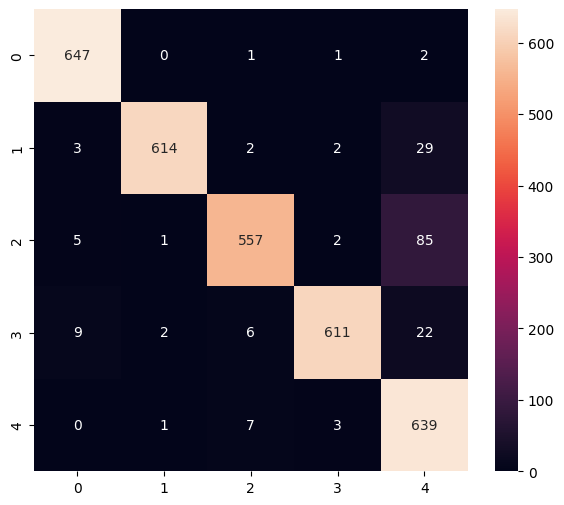

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       651
           1       0.99      0.94      0.97       650
           2       0.97      0.86      0.91       650
           3       0.99      0.94      0.96       650
           4       0.82      0.98      0.90       650

    accuracy                           0.94      3251
   macro avg       0.95      0.94      0.94      3251
weighted avg       0.95      0.94      0.94      3251


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [ ]:
df = pd.read_csv(dataset)
df

,0,0.0,0.0.1,-0.17094017094017094,-0.11965811965811966,-0.2564102564102564,-0.29914529914529914,-0.1623931623931624,-0.4358974358974359,-0.008547008547008548,...,0.4017094017094017,-0.9145299145299145,0.27350427350427353,-0.37606837606837606,0.3504273504273504,-0.5384615384615384.1,0.39316239316239315,-0.6410256410256411,0.42735042735042733,-0.7350427350427351
0,0,0.0,0.0,-0.155963,-0.018349,-0.311927,-0.128440,-0.330275,-0.302752,-0.266055,...,-0.550459,-1.000000,-0.027523,-0.568807,-0.165138,-0.743119,-0.247706,-0.844037,-0.330275,-0.926606
1,0,0.0,0.0,-0.181102,-0.070866,-0.307087,-0.212598,-0.251969,-0.362205,-0.118110,...,-0.110236,-0.976378,0.062992,-0.472441,0.047244,-0.637795,0.023622,-0.748031,0.007874,-0.842520
2,0,0.0,0.0,-0.211864,-0.025424,-0.389831,-0.152542,-0.355932,-0.313559,-0.237288,...,-0.372881,-1.000000,-0.050847,-0.508475,-0.118644,-0.677966,-0.169492,-0.779661,-0.211864,-0.872881
3,0,0.0,0.0,-0.149254,-0.134328,-0.223881,-0.328358,-0.126866,-0.462687,0.007463,...,0.223881,-0.917910,0.186567,-0.417910,0.223881,-0.567164,0.253731,-0.664179,0.276119,-0.753731
4,0,0.0,0.0,-0.124031,-0.139535,-0.170543,-0.333333,-0.046512,-0.434109,0.100775,...,0.341085,-0.922481,0.263566,-0.395349,0.333333,-0.550388,0.364341,-0.651163,0.387597,-0.744186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12995,2,0.0,0.0,-0.388158,0.032895,-0.710526,-0.026316,-0.934211,-0.072368,-1.000000,...,-0.355263,-0.236842,-0.164474,-0.539474,-0.342105,-0.217105,-0.256579,-0.138158,-0.177632,-0.210526
12996,2,0.0,0.0,-0.388158,0.026316,-0.703947,-0.032895,-0.927632,-0.072368,-1.000000,...,-0.348684,-0.230263,-0.151316,-0.546053,-0.335526,-0.223684,-0.250000,-0.138158,-0.171053,-0.210526
12997,2,0.0,0.0,-0.385621,0.032680,-0.699346,-0.026144,-0.921569,-0.071895,-1.000000,...,-0.352941,-0.222222,-0.163399,-0.535948,-0.339869,-0.215686,-0.261438,-0.130719,-0.176471,-0.202614
12998,2,0.0,0.0,-0.396104,0.038961,-0.707792,-0.025974,-0.922078,-0.064935,-1.000000,...,-0.357143,-0.220779,-0.162338,-0.525974,-0.344156,-0.207792,-0.259740,-0.123377,-0.181818,-0.194805


# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)



6616

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 215 µs, sys: 0 ns, total: 215 µs
Wall time: 165 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.93274254 0.02095269 0.02910397 0.00515648 0.01204431]
0
